In [32]:
import torch
import matplotlib.pyplot as plt
from dataloader import MRIDataset
from residual3dunet.model import ResidualUNet3D
from torch.utils.data import Dataset, DataLoader
from utils import dice_coefficient, iou, plotloss, plotaccuracy
import torchvision.transforms as T
import re

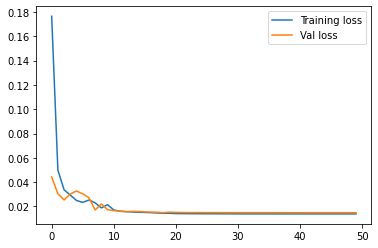

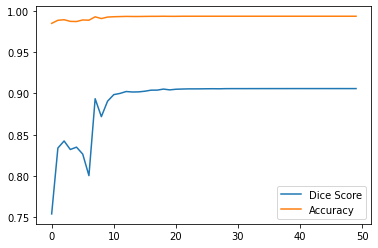

In [34]:
# plotloss('slurm-953468.out')
# plt.figure()
# plotaccuracy('slurm-953468.out')

plotloss('output/train4.out')
plt.figure()
plotaccuracy('output/train4.out')


In [35]:
device = torch.device('cpu')
model = ResidualUNet3D(in_channels=1, out_channels=1, testing=True).to(device)
model.load_state_dict(torch.load("model/model4.pt", map_location=device))

<All keys matched successfully>

In [36]:
testdataset = MRIDataset(train=False, transform=T.ToTensor())
test_loader = DataLoader(dataset = testdataset, batch_size=1, shuffle=False)

In [37]:
model.eval()

dataiter = iter(test_loader)
data = dataiter.next()
# data = dataiter.next()
# data = dataiter.next()
features, labels = data

features, labels = features.float().to(device), labels.float().to(device)

output = model(features)

# for data, target in test_loader:
#     data, target = data.float().to(device), target.float().to(device)
#     output = model(data)
#     break

In [38]:
# preds = torch.sigmoid(output)
preds = (output > 0.5).float()

print(preds.shape)
batch, channel, depth, width, height = preds.shape

print(dice_coefficient(preds, labels))
print(iou(preds, labels))

torch.Size([1, 1, 14, 240, 240])
tensor(0.9266)
tensor(0.9820)


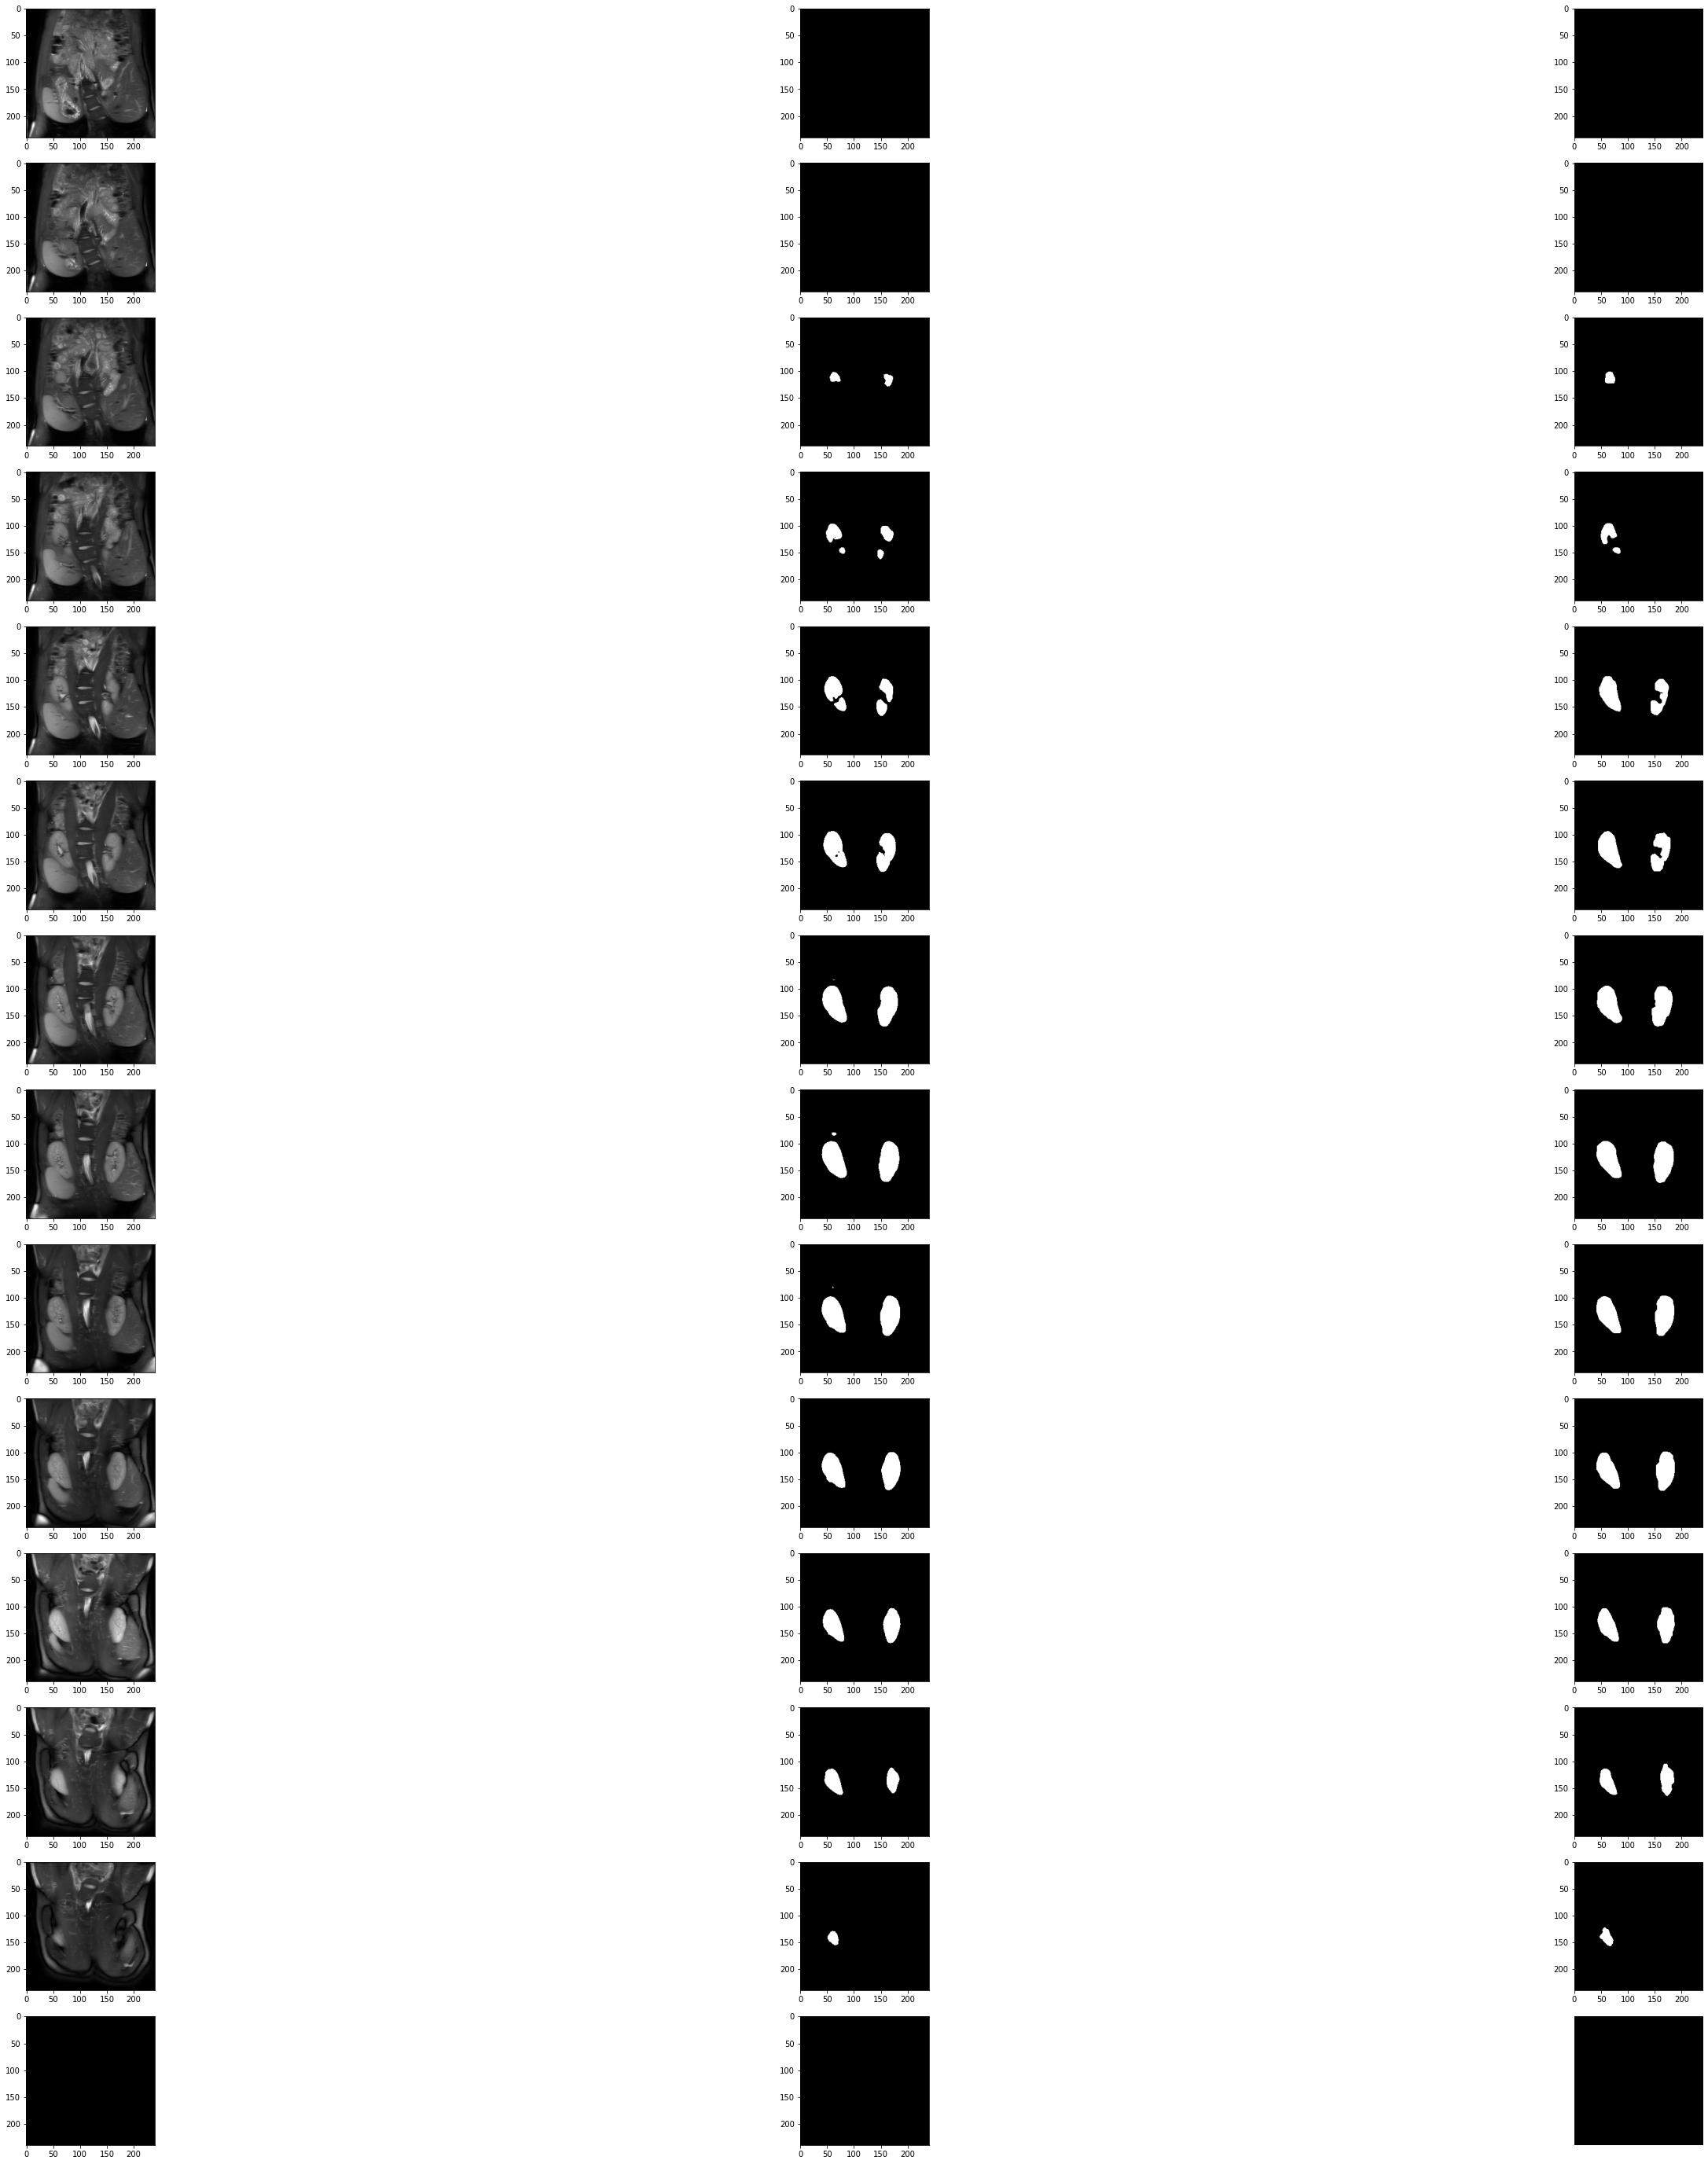

In [39]:
# Visualize Single Image Data
f, axarr = plt.subplots(14,3,figsize=(50,50))

for i in range(depth):
    axarr[i,0].imshow(features[0,0,i,:,:],cmap='gray')
    axarr[i,1].imshow(preds[0,0,i,:,:],cmap='gray')
    axarr[i,2].imshow(labels[0,0,i,:,:],cmap='gray')
    plt.axis('off')